# Customizing Colorbars


In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
%matplotlib inline
import numpy as np 

Let's create a simple colorbar with the `plt.colorbar` function:

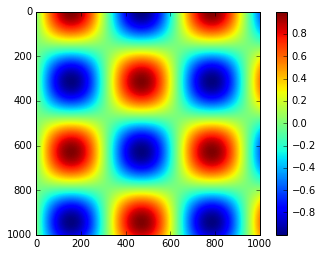

In [8]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

# Customizing Colorbars

The colormap can be specified using the `cmap` argument to the plotting function that is creating the visualization:

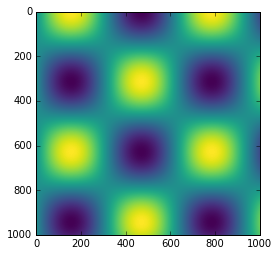

In [28]:
plt.imshow(I, cmap='viridis');

## Choosing the Colormap

There are three different categories of colormaps:

* _Squential colormaps_: There are made up of one continuous sequence of colors (e.g., `binary` or `viridis`).
* _Divergent colormaps_: These usually contain two distinct colors, which show positive and negative deviations from a mean (e.g., `RdBu` or `PuOr`).
* _Qualitative colormaps_: These mix colors with no particular squence (e.g., `rainbow` or `jet`).

## Color limits and extensions

Matplotlib allows for a large range of colorbar customization. The colorbar itself is simply an instance of `plt.Axes`, so all of the axes and ticks formatting ticks we've learned are applicable. The colorbar has some interesting flexibility: for example, we can narrow the color limits and indicate the out-of-bounds values with a triangular arrow at the top and bottom by setting the `extend` property. This might come in handy, for example, if displaying an image that is subject to noise:

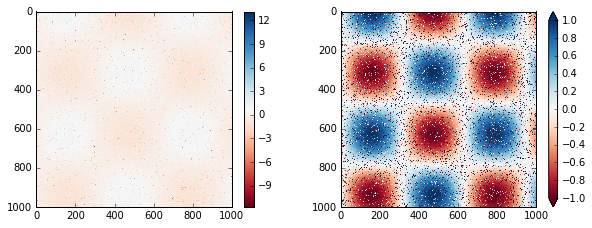

In [37]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

Notice that in the left panel, the deafult color limits respond to the noisy pixels, and the range of the noise completely washes-out the pattern we are interested in. In the right panel, we manually set the color limits, and add extensions to indicate values with are above or below those limits. The result is a much more useful visualization of our data.


## Discrete Color Bars

Colormaps are by default continuous, but sometimes you'd like to represent discrete values. The easiest way to do this is to use the `plt.cm.get_cmap()` function, and pass the name of a suitable colormap along with the number of desired bins:

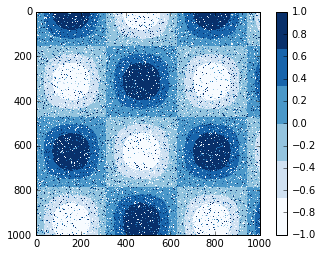

In [38]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1)

# Example: Handwirtten Digits

For an example of where this might be useful, let's look at an interesting visualization of some hand written digits data.         This data is included in Scikit-Learn, and consists of nearly 2,000 $8 * 8$ thumbnails showing various hand-written digits.

For now, let's start by downloading the digits data and visualizng several of the example images with `plt.imshow()`:

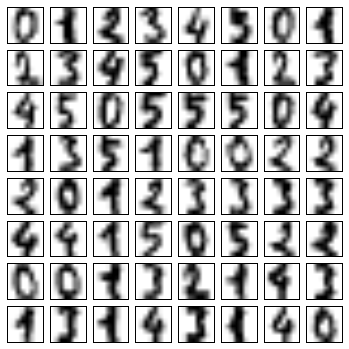

In [48]:
# Load images of the digits 0 through 5 and visualize several of them
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

Let's take a look at a two-dimensional manifold learning projection of this digits data.

In [65]:
# project the digits into 2 dimensions using IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

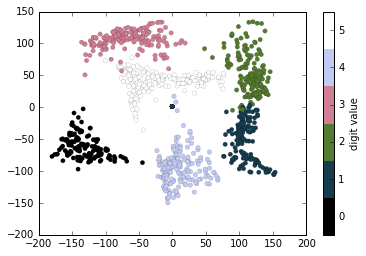

In [63]:
# plot the results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
           c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)